In [3]:
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [16]:
joined=pd.read_csv('data/model_data/trans_with_no_withdrawal_credit.csv').dropna()
joined=joined.loc[:, ~joined.columns.str.contains('^Unnamed')]	

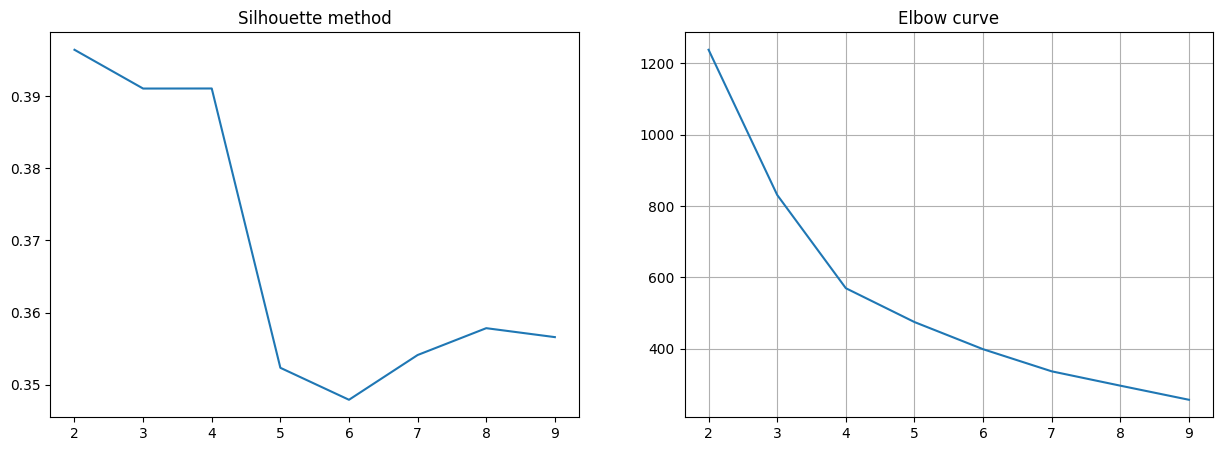

In [17]:
RANDOM_STATE=42

X=joined.drop(['loans'],axis=1)
X.drop(columns=['min no. trans', 'date'], inplace=True)
y = joined["loans"]

X = StandardScaler().fit_transform(X)
X = PCA(n_components=2, random_state=RANDOM_STATE).fit_transform(X)

wss = []
silhouette = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
    silhouette.append(metrics.silhouette_score(X, kmeans.labels_))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(range(2, 10), silhouette)
ax[1].plot(range(2, 10), wss)

plt.grid(True)

ax[0].set_title('Silhouette method')
ax[1].set_title('Elbow curve')

plt.show()

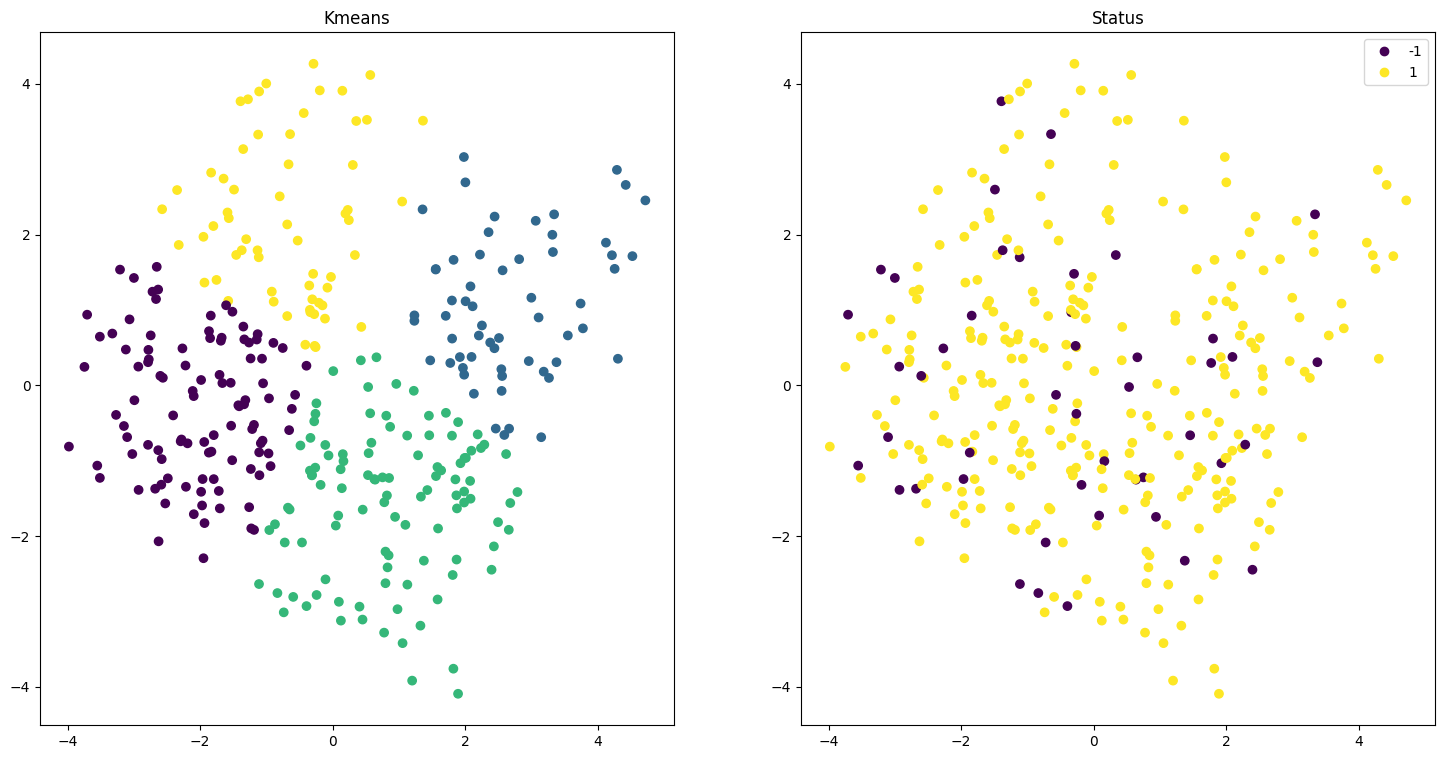

In [20]:
X=joined.drop(['loans'],axis=1)
X.drop(columns=['min no. trans', 'date'], inplace=True)
y = joined["loans"]

X = StandardScaler().fit_transform(X)
X = PCA(n_components=2, random_state=RANDOM_STATE).fit_transform(X)
db = KMeans(n_clusters=4, random_state=RANDOM_STATE).fit_predict(X)

# Plot result

fig, axs = plt.subplots(1, 2, figsize=(18, 9))

axs[0].scatter(X[:, 0], X[:, 1], c=db)

scatter = axs[1].scatter(X[:, 0], X[:, 1], c=y)

axs[0].set_title("Kmeans")
axs[1].set_title("Status")

axs[1].legend(handles=scatter.legend_elements()[0], labels=[-1, 1]);

<AxesSubplot: xlabel='principal component 1', ylabel='principal component 2'>

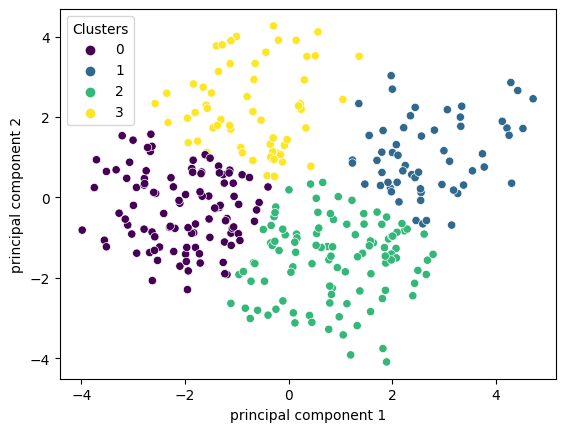

In [23]:
import sklearn.cluster as cluster
import seaborn as sns
kmeans = cluster.KMeans(n_clusters=4, random_state=42)
X=joined.drop(['loans'],axis=1)
X.drop(columns=['min no. trans', 'date'], inplace=True)
y = joined["loans"]

X = StandardScaler().fit_transform(X)
X = PCA(n_components=2, random_state=RANDOM_STATE).fit_transform(X)

pca_df = pd.DataFrame(data = X, columns = ['principal component 1', 'principal component 2'])
kmeans = kmeans.fit(pca_df)

pca_df['Clusters'] = kmeans.labels_

sns.scatterplot(x="principal component 1", y="principal component 2",hue = 'Clusters',  data=pca_df,palette='viridis')

Clustering is the task of segmenting a set of data into distinct groups such that the data points in the same group will bear similar characteristics as opposed to those data points which lie in the groups/clusters. 
Objective is to segregate groups having similar characteristics assign them unique clusters:
- The points present in the same cluster should have similar properties
- The points present in the different clusters should be as dissimilar as possible

K-Means Clustering comes under the category of Unsupervised Machine Learning algorithms, these algorithms group an unlabeled dataset into distinct clusters. 
The K defines the number of pre-defined clusters that need to be created. 
The primary goal while implementing k-means involves defining k clusters such that total within-cluster variation (or error) is minimum.

The cluster center is the arithmetic mean of all the data points that belong to that cluster. The squared distance between every given point and its cluster center is called variation. The goal of the k-means clustering is to ascertain these k clusters and their centers whilst reducing the total error.

Clustering algorithms like K-means require feature scaling of the data as part of data preprocessing to produce good results. This is because clustering techniques use distance calculation between the data points. Hence it is proper to bring data of different units under a common scale ---> used StandardScaler

#### How to find optimum number of clusters in K Means?

- Elbow Method;
- Silhouette.

The Elbow Method is a popular technique for determining the optimal number of clusters. We calculate the Within-Cluster-Sum of Squared Errors (WCSS) for various values of k and choose the k for which WSS first starts to diminish. In the plot of WSS-versus-k, this can be observed as an elbow.

We can see that there is an elbow bend at K=4, it is the point after which WCSS does not diminish much with the increase in value of K.

The Silhouette Method measures the similarity of a data point within its cluster. It has a range between +1 and -1 and the higher values denote a good clustering. The maximum value is for k=6.

PCA (Principal component analysis) reduces the dimension of the dataset to only two while still preserving the information.  And then clustering can be applied to this transformed dataset and then visualized in a 2-D plot. Moreover, PCA can also help to avoid the curse of dimensionality.